In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df1 = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', sep=',', header=None)

In [11]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [12]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,...,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,...,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414,0.492937
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004220,-2.701936,-3.668585,-4.227337,-4.007630,-3.480666,-2.779832,-2.165808,-1.773870,-1.362003,...,-1.087720,-1.588237,-2.146835,-2.730750,-3.031224,-2.868603,-2.154560,-1.658289,-1.596809,0.000000
50%,-0.297541,-1.661892,-2.586129,-3.388210,-3.469899,-2.947061,-2.285427,-1.750084,-1.422457,-0.910384,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.568443,1.000000
75%,0.499909,-0.677998,-1.514187,-2.235690,-2.531153,-2.398797,-1.823480,-1.484107,-1.063592,-0.476477,...,1.169392,1.238651,1.264379,1.234408,1.033957,0.945027,0.951621,1.002628,0.271635,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


In [13]:
df1.shape

(4998, 141)

In [16]:
df1 = df1.add_prefix("c")

In [18]:
df1.columns

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       ...
       'c131', 'c132', 'c133', 'c134', 'c135', 'c136', 'c137', 'c138', 'c139',
       'c140'],
      dtype='object', length=141)

In [21]:
df1['c140'].value_counts()

1.0    2919
0.0    2079
Name: c140, dtype: int64

In [26]:
df1['c1'].values.min()

-7.0903741

In [29]:
train_data, test_data, train_label, test_label = train_test_split(df1.values[:, 0:-1], df1.values[:, -1], test_size=0.2, random_state=21)

In [28]:
import tensorflow as tf

In [30]:
train_data.shape

(3998, 140)

In [32]:
min_value = tf.reduce_min(train_data)
max_value = tf.reduce_max(train_data)
train_data = (train_data-min_value)/(max_value-min_value)
test_data = (test_data-min_value)/(max_value-min_value)

In [33]:
test_label = test_label.astype(bool)
train_label = train_label.astype(bool)

normal_train_data = train_data[train_label]
normal_test_data = test_data[test_label]

anomalous_train_data = train_data[~train_label]
anomalous_test_data = test_data[~test_label]

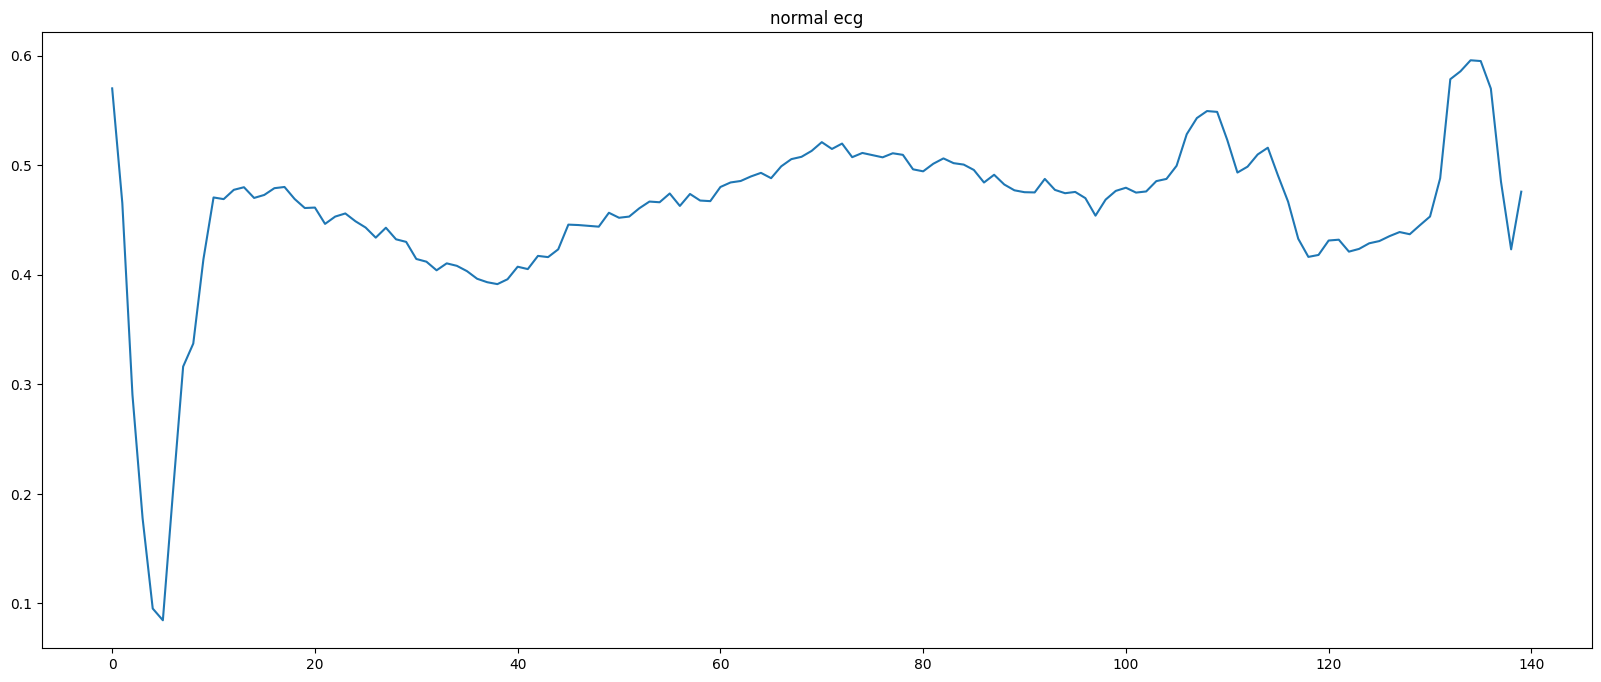

In [40]:
plt.figure(figsize=(20, 8))
plt.plot(np.arange(140), normal_train_data[0])
plt.title("normal ecg")
plt.show()

Text(0.5, 1.0, 'anomalous ecg')

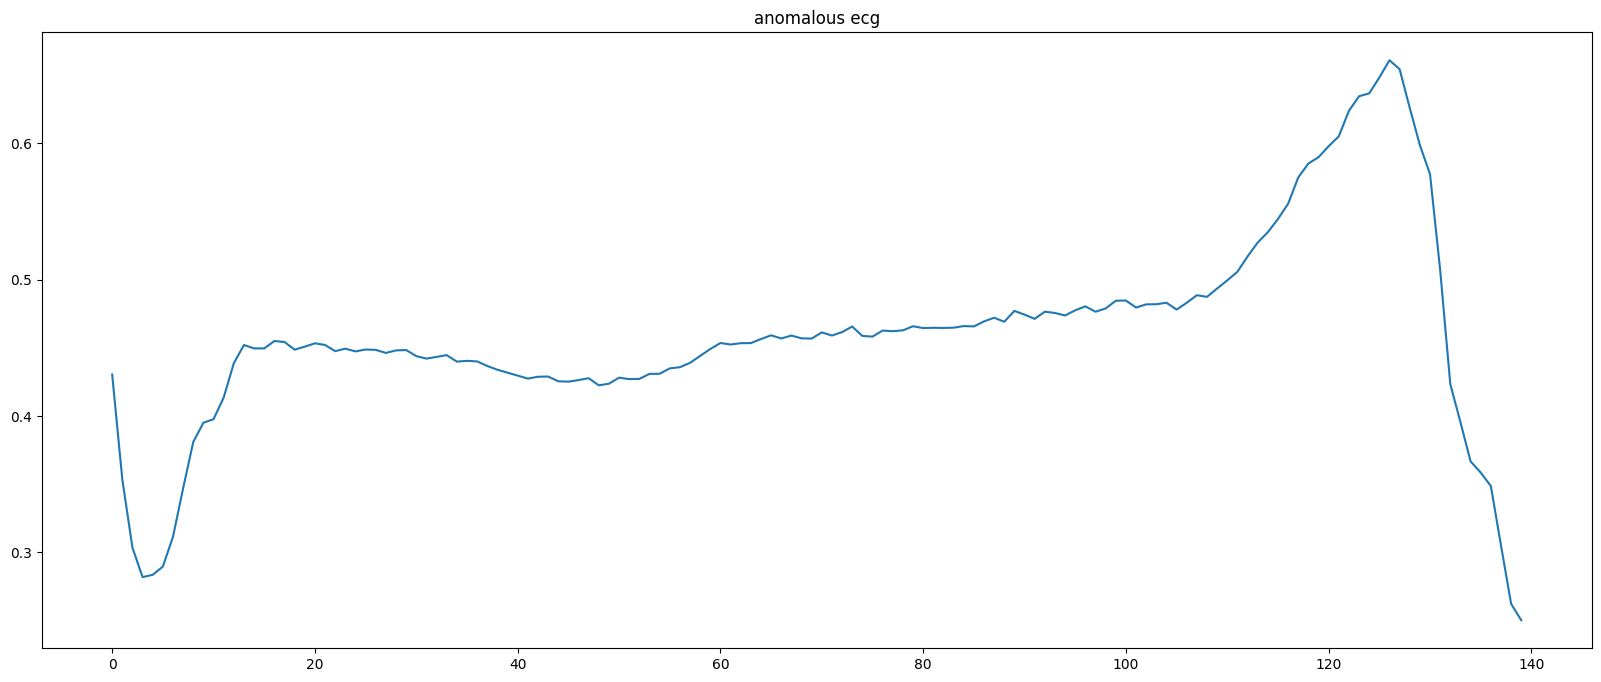

In [38]:
plt.figure(figsize=(20, 8))
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("anomalous ecg")

In [41]:
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = Sequential([
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(8, activation='relu')
        ])
        self.decoder = Sequential([
            Dense(16, activation='relu'),
            Dense(32, activation='relu'),
            Dense(140, activation='sigmoid')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
autoencoder = AnomalyDetector()

In [45]:
autoencoder.compile(optimizer='adam', loss='mae', metrics=['accuracy'])

In [47]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 2, mode = 'min')

In [54]:
history = autoencoder.fit(normal_train_data, normal_train_data,
                          epochs=25, batch_size=512, callbacks=[early_stopping],
                          validation_data=(normal_test_data, normal_test_data)
                         )

Epoch 1/25
5/5 [==============================] - 0s 56ms/step - loss: 0.0156 - accuracy: 0.1624 - val_loss: 0.0155 - val_accuracy: 0.1518
Epoch 2/25
5/5 [==============================] - 0s 33ms/step - loss: 0.0155 - accuracy: 0.1619 - val_loss: 0.0154 - val_accuracy: 0.1536
Epoch 3/25
5/5 [==============================] - 0s 32ms/step - loss: 0.0154 - accuracy: 0.1645 - val_loss: 0.0152 - val_accuracy: 0.1411
Epoch 4/25
5/5 [==============================] - 0s 32ms/step - loss: 0.0153 - accuracy: 0.1696 - val_loss: 0.0151 - val_accuracy: 0.1393
Epoch 5/25
5/5 [==============================] - 0s 32ms/step - loss: 0.0151 - accuracy: 0.1827 - val_loss: 0.0150 - val_accuracy: 0.1571
Epoch 6/25
5/5 [==============================] - 0s 29ms/step - loss: 0.0150 - accuracy: 0.1768 - val_loss: 0.0147 - val_accuracy: 0.1554
Epoch 7/25
5/5 [==============================] - 0s 33ms/step - loss: 0.0149 - accuracy: 0.1780 - val_loss: 0.0147 - val_accuracy: 0.1500
Epoch 8/25
5/5 [===========

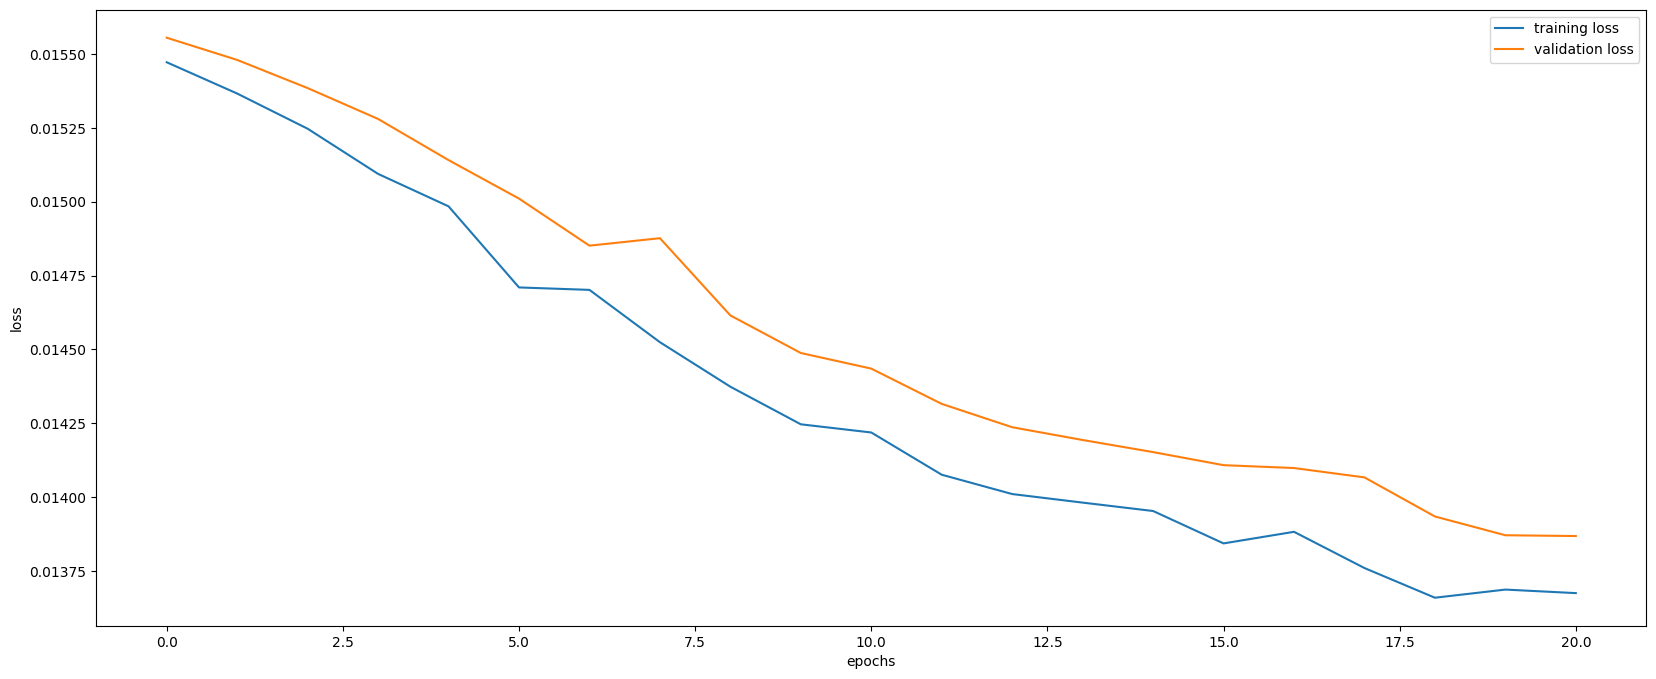

In [55]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['val_loss'], label="training loss")
plt.plot(history.history['loss'], label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [56]:
normal_encoded_imgs = autoencoder.encoder(normal_test_data).numpy()
normal_decoded_imgs = autoencoder.decoder(normal_encoded_imgs).numpy()

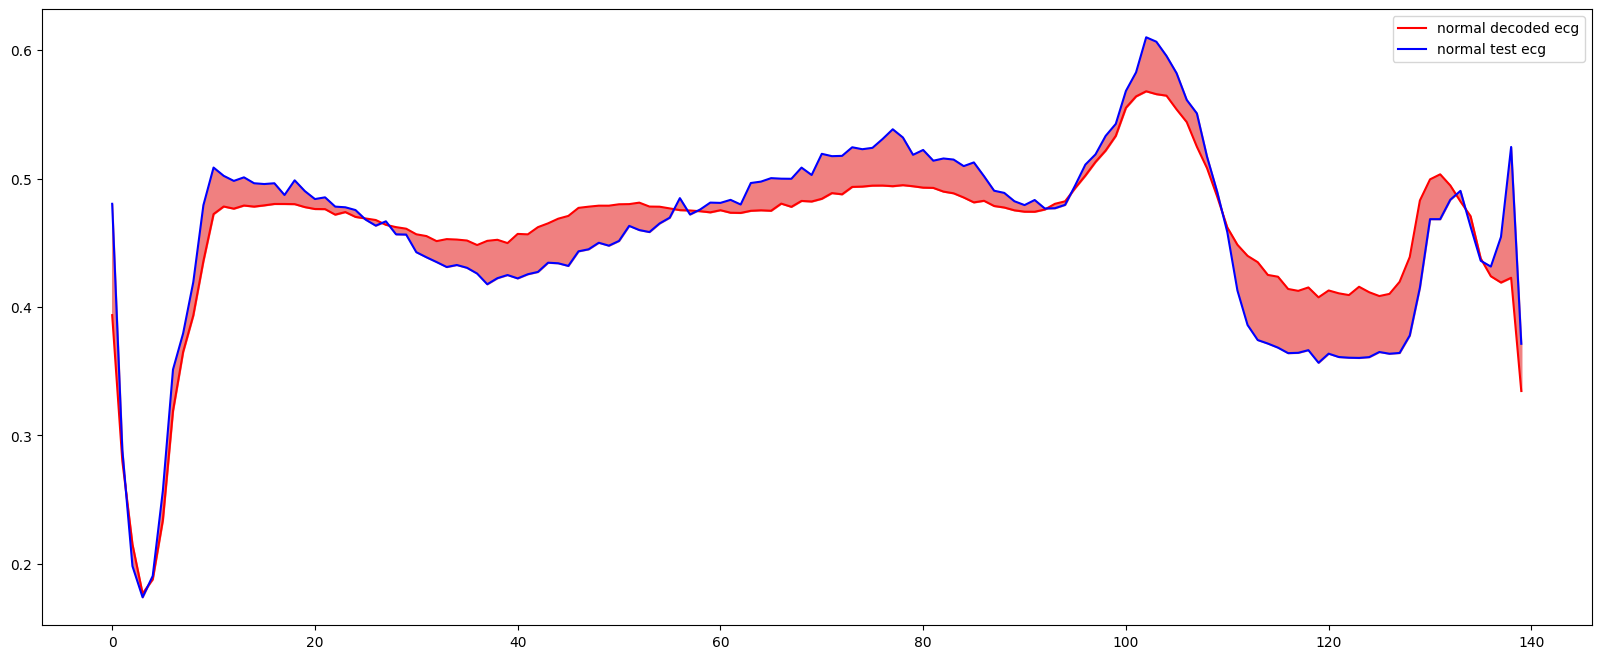

In [61]:
plt.figure(figsize=(20, 8))
plt.plot(normal_decoded_imgs[0], color='r', label="normal decoded ecg")
plt.plot(normal_test_data[0], color='b', label="normal test ecg")
plt.fill_between(np.arange(140), normal_decoded_imgs[0], normal_test_data[0], color='lightcoral')
plt.legend()
plt.show()

In [58]:
anomalous_encoded_imgs = autoencoder.encoder(anomalous_test_data).numpy()
anomalous_decoded_imgs = autoencoder.decoder(anomalous_encoded_imgs).numpy()

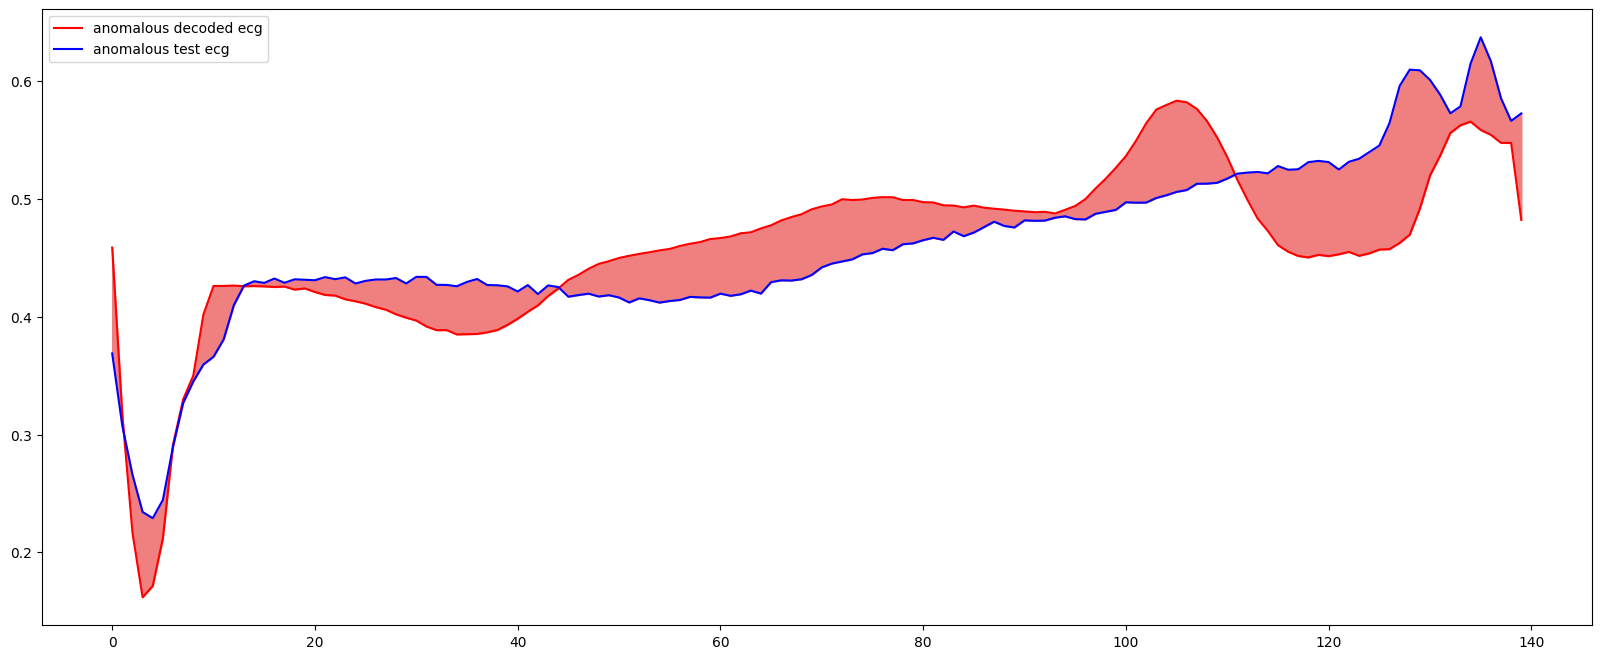

In [60]:
plt.figure(figsize=(20, 8))
plt.plot(anomalous_decoded_imgs[0], color='r', label="anomalous decoded ecg")
plt.plot(anomalous_test_data[0], color='b', label="anomalous test ecg")
plt.fill_between(np.arange(140), anomalous_decoded_imgs[0], anomalous_test_data[0], color='lightcoral')
plt.legend()
plt.show()

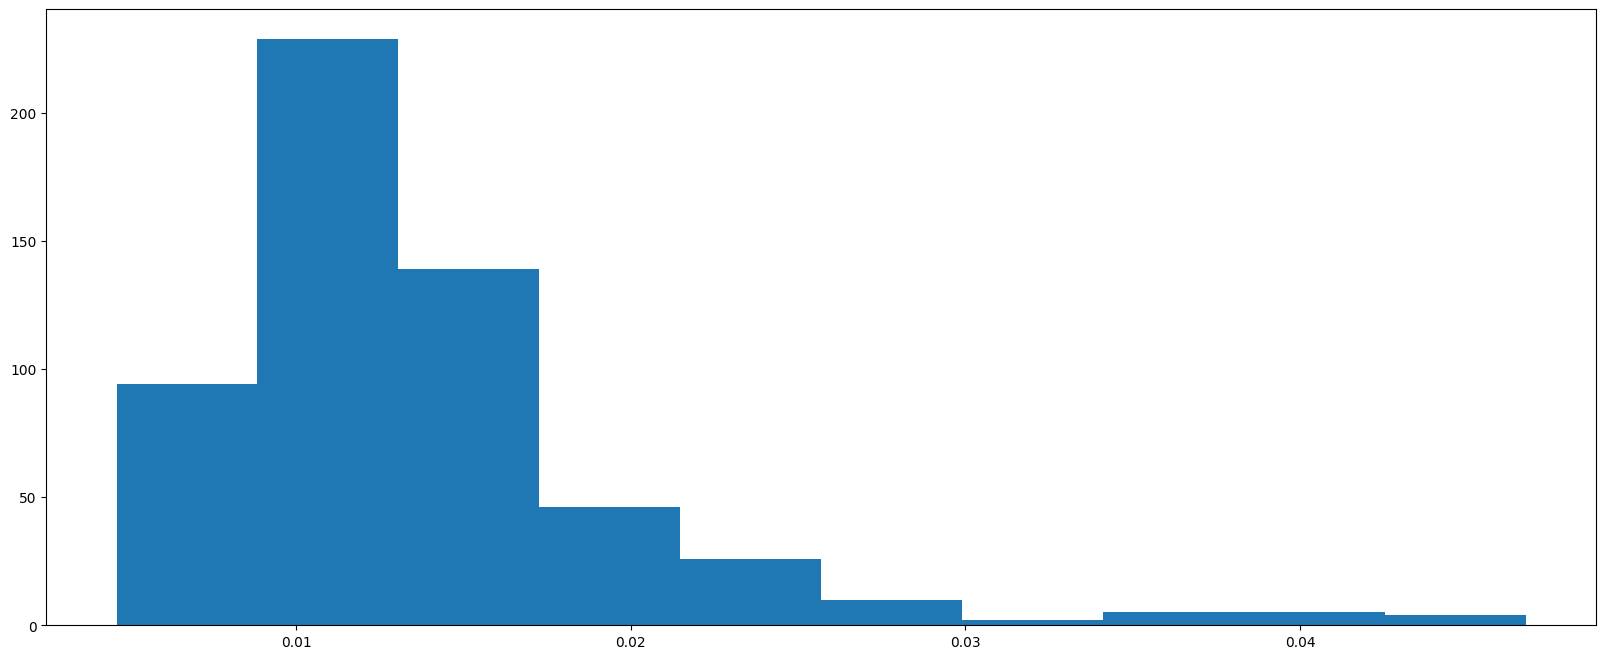

In [70]:
plt.figure(figsize=(20, 8))
normal_reconstructions = autoencoder.predict(normal_test_data)
normal_loss = tf.losses.mae(normal_reconstructions, normal_test_data)
plt.hist(normal_loss, bins=10)
plt.show()

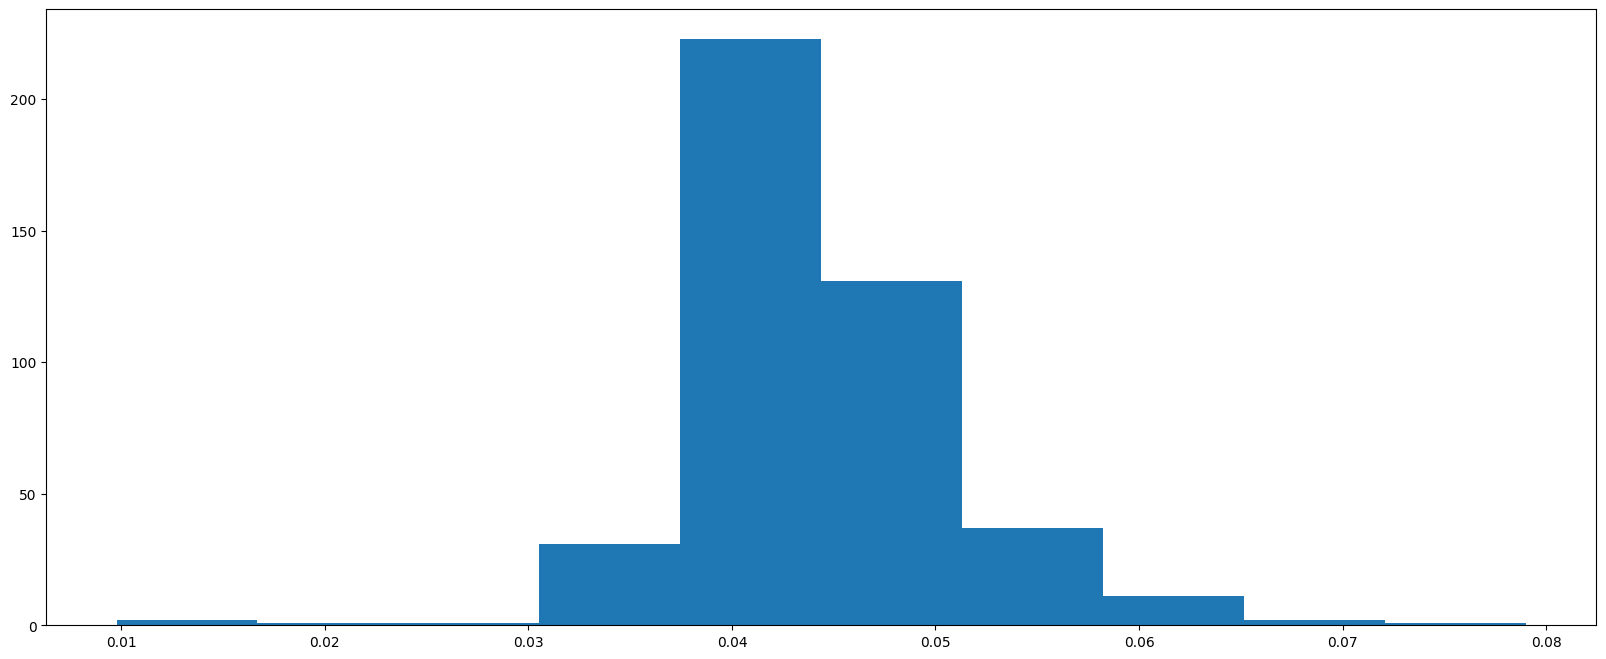

In [65]:
plt.figure(figsize=(20, 8))
reconstructions = autoencoder.predict(anomalous_test_data)
anomalous_loss = tf.losses.mae(reconstructions, anomalous_test_data)
plt.hist(anomalous_loss, bins=10)
plt.show()

In [68]:
threshold = np.mean(normal_loss) + 2*np.std(normal_loss)
print(threshold)

0.026335979843323885


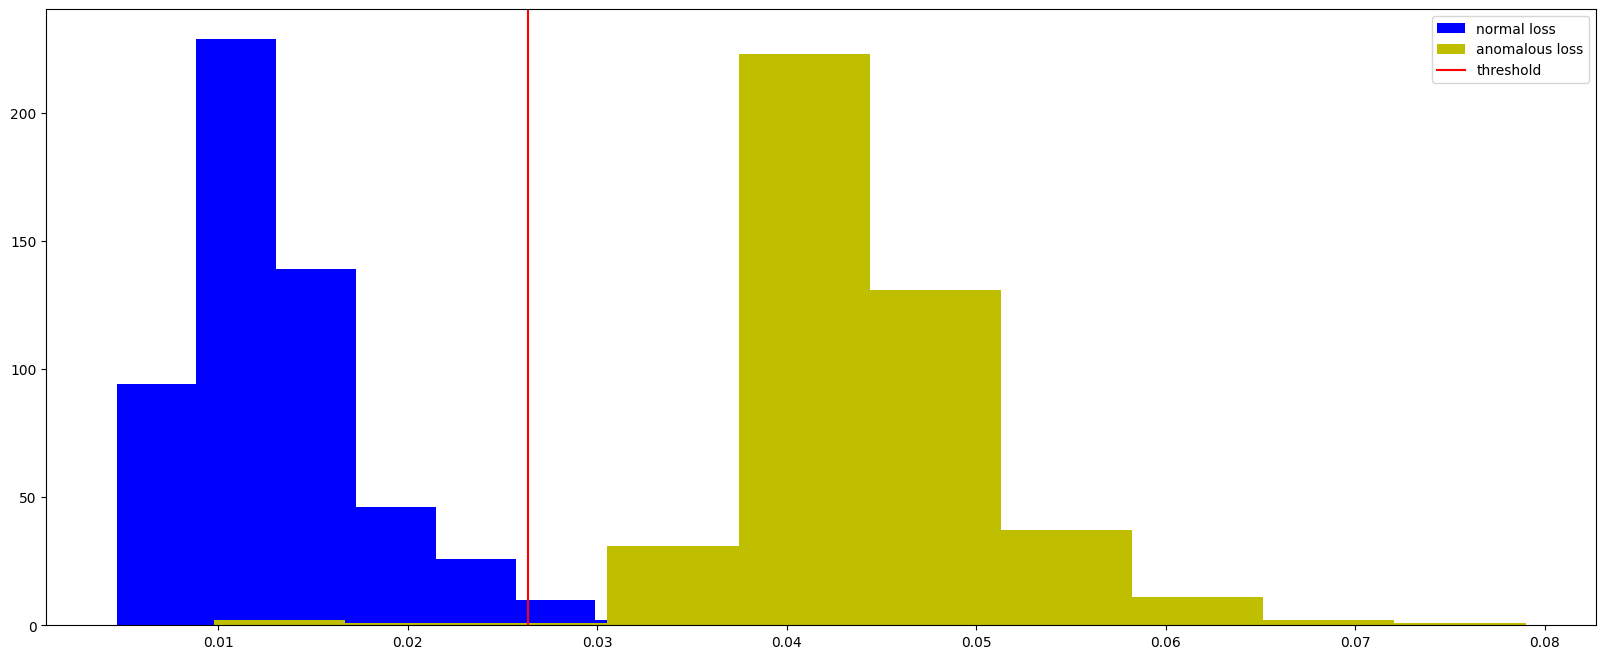

In [72]:
plt.figure(figsize=(20, 8))
plt.hist(normal_loss, bins=10, color='b', label="normal loss")
plt.hist(anomalous_loss, bins=10, color='y', label="anomalous loss")
plt.axvline(threshold, color='r', label="threshold")
plt.legend()
plt.show()